In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.optimizers import Adam

In [3]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,MinMaxScaler

In [4]:
path = "https://raw.githubusercontent.com/laxmimerit/Building-Your-First-ANN-with-TensorFlow-2.0/master/Customer_Churn_Modelling.csv"

df = pd.read_csv(path)

print("DataFrame Shape : {}".format(df.shape))

DataFrame Shape : (10000, 14)


In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
X = df.drop(labels = ["RowNumber","CustomerId","Surname","Exited"], axis = 1)
y = df["Exited"]

In [8]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [9]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [10]:
for col in X.columns:

    if X[col].dtype == "object":
        
        print(f"{col} Unique : {X[col].unique()} ")

Geography Unique : ['France' 'Spain' 'Germany'] 
Gender Unique : ['Female' 'Male'] 


In [11]:
# Gender
X["Gender"] = LabelEncoder().fit_transform(X["Gender"])

#Geography
X = pd.get_dummies(X , drop_first=True, columns = ["Geography"])

X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1


In [12]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [13]:
scaler = MinMaxScaler(feature_range = (0,1))

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
print("X Train Max : {}".format(X_train_scaled.max()))
print("X Train Min : {}".format(X_train_scaled.min()))
print()
print("X Test Max : {}".format(X_test_scaled.max()))
print("X Test Min : {}".format(X_test_scaled.min()))

X Train Max : 1.0000000000000002
X Train Min : 0.0

X Test Max : 1.0
X Test Min : 0.0


In [15]:
print("X Train Shape : {}".format(X_train.shape))
print("Y Train Shape : {}".format(y_train.shape))
print()
print("X Test Shape : {}".format(X_test.shape))
print("Y Test Shape : {}".format(y_test.shape))

X Train Shape : (8000, 11)
Y Train Shape : (8000,)

X Test Shape : (2000, 11)
Y Test Shape : (2000,)


# Model Build

In [16]:
model = Sequential()

model.add(Dense(X_train_scaled.shape[1], activation="relu",input_dim = X_train_scaled.shape[1]))
model.add(Dense(128,activation = "relu"))
model.add(Dense(1,activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 11)                132       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1536      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 1,797
Trainable params: 1,797
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(X_train_scaled, y_train, epochs = 10,batch_size = 10 , validation_data = (X_test_scaled,y_test))

Epoch 1/10
800/800 [==============================] - 2s 2ms/step - loss: 0.4728 - accuracy: 0.7981 - val_loss: 0.4431 - val_accuracy: 0.8110
Epoch 2/10
800/800 [==============================] - 1s 2ms/step - loss: 0.4404 - accuracy: 0.8076 - val_loss: 0.4284 - val_accuracy: 0.8155
Epoch 3/10
800/800 [==============================] - 1s 2ms/step - loss: 0.4283 - accuracy: 0.8146 - val_loss: 0.4225 - val_accuracy: 0.8155
Epoch 4/10
800/800 [==============================] - 1s 2ms/step - loss: 0.4193 - accuracy: 0.8207 - val_loss: 0.4145 - val_accuracy: 0.8250
Epoch 5/10
800/800 [==============================] - 1s 2ms/step - loss: 0.4089 - accuracy: 0.8273 - val_loss: 0.3990 - val_accuracy: 0.8325
Epoch 6/10
800/800 [==============================] - 1s 2ms/step - loss: 0.3887 - accuracy: 0.8403 - val_loss: 0.3757 - val_accuracy: 0.8405
Epoch 7/10
800/800 [==============================] - 1s 2ms/step - loss: 0.3659 - accuracy: 0.8471 - val_loss: 0.3620 - val_accuracy: 0.8505
Epoch 

In [18]:
def history_graph(history):

    plt.figure(figsize = (15,6))
    size = 15
    plt.subplot(1,2,1)
    plt.plot(history.history["accuracy"], label = "Train")
    plt.plot(history.history["val_accuracy"], label = "Test")
    plt.legend(loc = "best")
    plt.title("Accuracy Graph", fontsize = size)
    plt.xlabel("Epochs", fontsize = size)
    plt.ylabel("Accuracy Score", fontsize = size)

    plt.subplot(1,2,2)
    plt.plot(history.history["loss"],label = "Train")
    plt.plot(history.history["val_loss"], label = "Test")
    plt.legend(loc = "best")
    plt.title("Loss Graph", fontsize = size)
    plt.xlabel("Epochs", fontsize = size)
    plt.ylabel("Loss Score", fontsize = size)

    plt.tight_layout()
    plt.show()

In [19]:
def confusion_graph(y_true, y_pred, classes = "auto"):

    from sklearn.metrics import confusion_matrix
    import seaborn as sns

    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize = (15,6))
    sns.heatmap(cm, annot = True, cbar = False, cmap = "viridis", annot_kws= {"size" : 15}, fmt = "d", xticklabels=classes , yticklabels = classes )
    
    size = 15
    plt.xlabel("Predicted",fontsize = size)
    plt.ylabel("Actual", fontsize = size)
    plt.title("Confusion Matrix" , fontsize = size)

In [20]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3477 - accuracy: 0.8555


In [21]:
loss, accuracy

(0.3477120101451874, 0.8554999828338623)

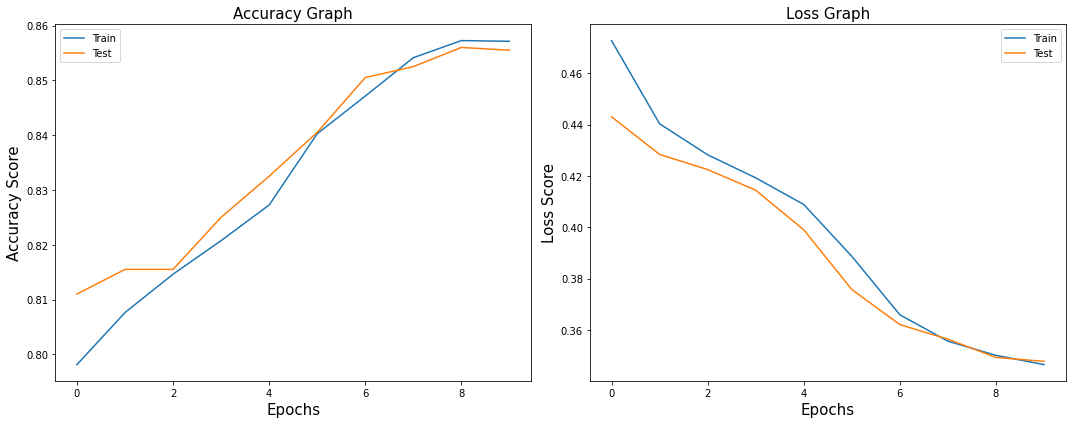

In [22]:
history_graph(history)

In [23]:
y_pred = model.predict(X_test_scaled)
y_pred = [1 if i > 0.5 else 0 for i in y_pred]
pd.Series(y_pred).value_counts()

0    1742
1     258
dtype: int64

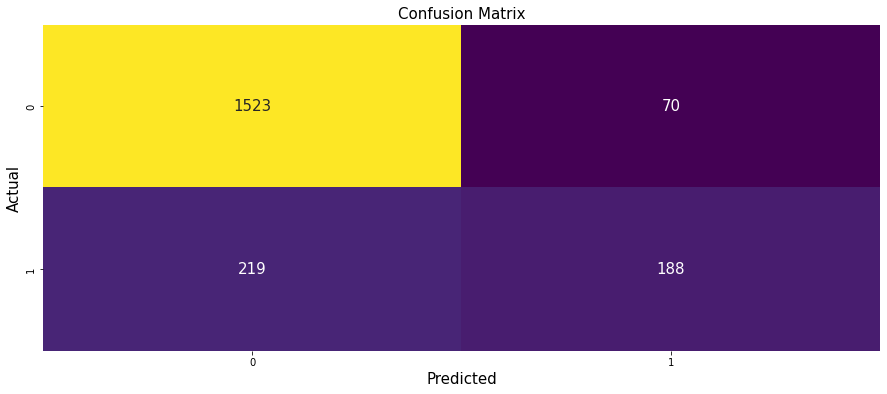

In [24]:
confusion_graph(y_test, y_pred)